In [57]:
import pandas as pd
import numpy as np
from decisionTree import DecisionTree
from randomForestt import RandomForest

In [58]:
%store -r total

In [48]:
test_df = total.head(555719)
train_df = total.tail(len(total) - 555719)

In [49]:
train_df = train_df.sample(n=10000, random_state=42)
test_df = test_df.sample(n=2000, random_state=42)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Suppose df is your DataFrame with non-numeric columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each non-numeric column
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col])
    if train_df[col].dtype == 'datetime64[ns]':
        train_df[col] = label_encoder.fit_transform(train_df[col])


for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = label_encoder.fit_transform(test_df[col])
    if test_df[col].dtype == 'datetime64[ns]':
        test_df[col] = label_encoder.fit_transform(test_df[col])


In [33]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1045211,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,PA,...,40.6153,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,1362841766,40.420453,-78.865012,0
547406,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,OR,...,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,1345650541,42.758860,-123.636337,0
110142,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,...,39.9636,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,1330824856,40.475159,-78.898190,0
1285953,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,1371413078,43.767506,-76.542384,0
271705,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,WY,...,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,1336974888,41.040392,-104.092324,0


In [50]:
X_train = train_df.drop(["is_fraud"], axis=1).values #Setting the X to do the split
y_train = train_df["is_fraud"].values # transforming the values in array

X_test = test_df.drop(["is_fraud"], axis=1).values #Setting the X to do the split
y_test = test_df["is_fraud"].values # transforming the values in array

In [51]:
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
print("Unique values in y_train:", unique_values_train)
print("Counts of unique values in y_train:", counts_train)

unique_values_test, counts_test = np.unique(y_test, return_counts=True)
print("Unique values in y_test:", unique_values_test)
print("Counts of unique values in y_test:", counts_test)

Unique values in y_train: [0 1]
Counts of unique values in y_train: [9941   59]
Unique values in y_test: [0 1]
Counts of unique values in y_test: [1996    4]


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [52]:
tree = DecisionTree(max_depth=None, min_samples_split=10, min_samples_leaf=4)
tree.fit(X_train, y_train)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc

import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [54]:

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9945


Area Under Precision-Recall Curve (AUPR): 0.34140909090909094


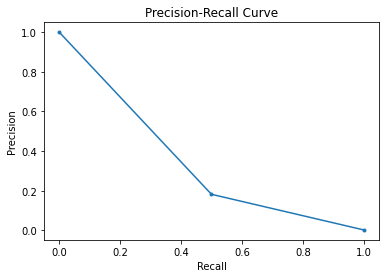

In [55]:

# Step 2: Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Step 3: Plot the Precision-Recall Curve

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Step 4: Compute AUPR
aupr = auc(recall, precision)
print("Area Under Precision-Recall Curve (AUPR):", aupr)

In [56]:

# Assuming y_true contains the true labels and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.26666666666666666


In [40]:
rf_classifier = RandomForest(n_estimators=50,
                                        max_depth=None,
                                        min_samples_split=10,
                                        min_samples_leaf=2)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.998


Area Under Precision-Recall Curve (AUPR): 0.501


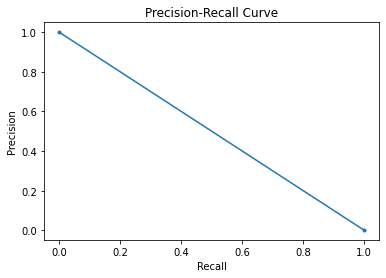

In [41]:

# Step 2: Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Step 3: Plot the Precision-Recall Curve

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Step 4: Compute AUPR
aupr = auc(recall, precision)
print("Area Under Precision-Recall Curve (AUPR):", aupr)

In [42]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.0
